<a href="https://colab.research.google.com/github/Shreyashgupta016/My-Projects/blob/main/Walmart_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The problem statement says that the retail giant Walmart wants to analyse customer spending behaviour across gender, and various other parameters on Black Friday. This data will be used to further predict the spending patterns of the larger customer base of 50 million males and 50 million females.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Categorizing people from 0 and 1 to 'Unmarried' and 'Married' in the Marital_Status column
def func(x):
  if x==0:
    return 'Unmarried'
  else:
    return 'Married'

In [ ]:
df['Marital_Status']=df['Marital_Status'].apply(func)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [ ]:
df.shape                 # shape of the data (the dataset has 180 rows and 9 columns)

(550068, 10)

In [ ]:
df.info()                # data types of all the features as well as the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 42.0+ MB


In [ ]:
df.isna().sum()             # checking null values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.describe(include='all').round(2)           # Statistical summary of the dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.00,550068,550068,550068,550068.00,550068,550068,550068,550068.00,550068.00
unique,NaN,3631,2,7,NaN,3,5,2,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,Unmarried,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731,NaN,NaN
mean,1003028.84,NaN,NaN,NaN,8.08,NaN,NaN,NaN,5.40,9263.97
std,1727.59,NaN,NaN,NaN,6.52,NaN,NaN,NaN,3.94,5023.07
min,1000001.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1.00,12.00
25%,1001516.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,5823.00
50%,1003077.00,NaN,NaN,NaN,7.00,NaN,NaN,NaN,5.00,8047.00
75%,1004478.00,NaN,NaN,NaN,14.00,NaN,NaN,NaN,8.00,12054.00


In [ ]:
df['Product_ID'].nunique()         # count of different product ids in the dataset 

3631

In [ ]:
df['Product_Category'].nunique()       # count of different product categories in the dataset 

20

In [ ]:
df['User_ID'].nunique()            # count of users in the dataset

5891

Analyzing spending patterns across Gender

In [ ]:
df['Gender'].value_counts(normalize=True)*100     # percentage of transactions done by each Gender 

M    75.310507
F    24.689493
Name: Gender, dtype: float64

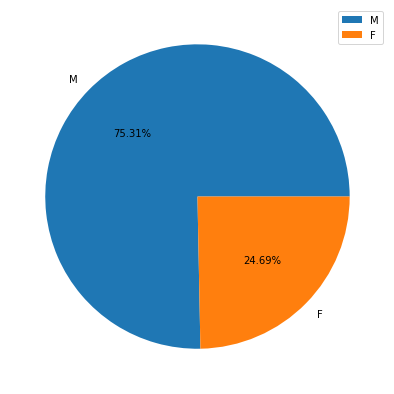

In [ ]:
# Plotting Pieplot to visualize the percentage spending of males and females in the smaple data
plt.figure(figsize=(10,7))
plt.pie(df['Gender'].value_counts(), 
        labels=df['Gender'].value_counts().index, 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

The sample dataset contains the data of almost 4200 males and 1600 females, comprising of 550068 rows, which means that there are total of 550068 items purchased from the Walmart on Black Friday. There are no null values in the dataset, but there are outliers in the purchase amount of both males and females.

In [ ]:
df.groupby('Gender')['Purchase'].agg(['mean','median','std']).round(2)

,mean,median,std
Gender,,,
F,8734.57,7914.0,4767.23
M,9437.53,8098.0,5092.19


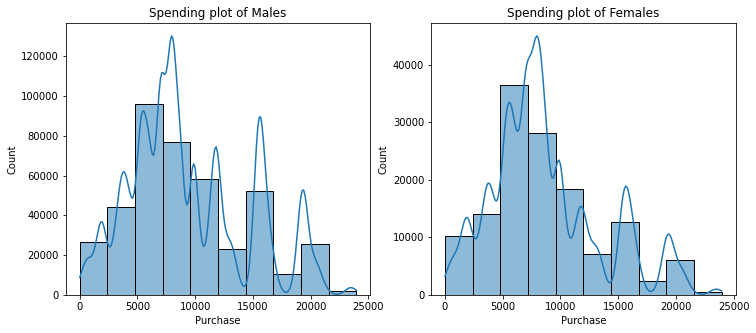

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df.loc[df['Gender']=='M'], x='Purchase', bins=10, kde=True)
plt.title('Spending plot of Males')

plt.subplot(1,2,2)
sns.histplot(data=df.loc[df['Gender']=='F'], x='Purchase', bins=10, kde=True)
plt.title('Spending plot of Females')

plt.show()

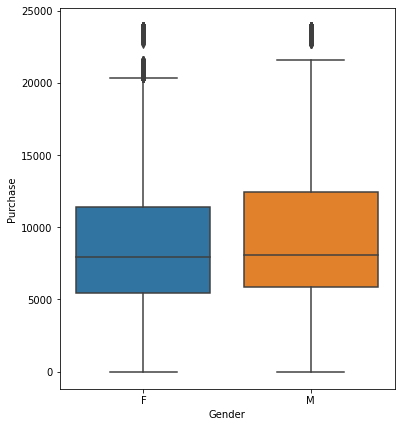

In [ ]:
plt.figure(figsize=(6,7))
sns.boxplot(data=df, y='Purchase', x='Gender')
plt.show()

In [ ]:
df.groupby('Gender')['User_ID'].nunique().sort_index(ascending=False)        # count of users in the dataset wrt Gender

Gender
M    4225
F    1666
Name: User_ID, dtype: int64

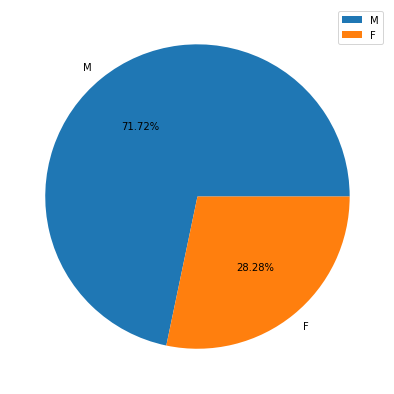

In [ ]:
# Plotting Pieplot to visualize the percentage count of males and females in the smaple data
plt.figure(figsize=(10,7))
plt.pie(df.groupby('Gender')['User_ID'].nunique().sort_index(ascending=False), 
        labels=df['Gender'].value_counts().index, 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

In [ ]:
male_spending = df.loc[df['Gender']=='M']
male_customers=male_spending.groupby('User_ID').agg(male_purchase_mean=('Purchase','mean'),
                                                    male_purchase_sum=('Purchase','sum'),
                                                   male_purchase_max=('Purchase','max'),
                                                   male_purchase_min=('Purchase','min'))
male_customers.reset_index(inplace=True)
male_customers

,User_ID,male_purchase_mean,male_purchase_sum,male_purchase_max,male_purchase_min
0,1000002,10525.610390,810472,20657,119
1,1000003,11780.517241,341635,19631,3646
2,1000004,14747.714286,206468,19693,481
3,1000005,7745.292453,821001,21021,1938
4,1000007,13804.000000,234668,19422,241
...,...,...,...,...,...
4220,1006030,12497.644068,737361,23285,743
4221,1006032,9404.745455,517261,23856,473
4222,1006033,13940.083333,501843,19703,368
4223,1006034,16423.833333,197086,23703,2311


In [ ]:
male_spending['User_ID'].value_counts().head(15)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001015     740
1005795     729
1005831     727
1002909     718
1001449     714
1002063     709
1004344     705
1003841     698
1003391     698
Name: User_ID, dtype: int64

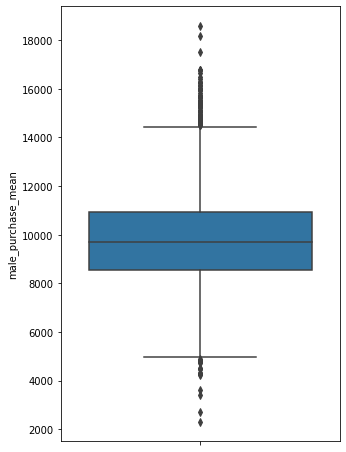

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(data=male_customers, y='male_purchase_mean')
plt.show()

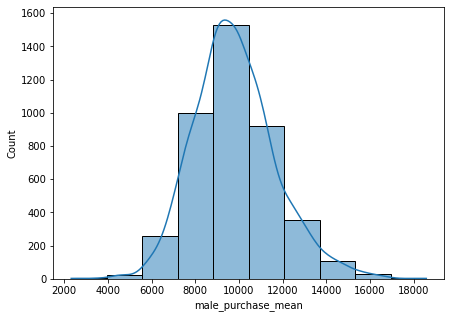

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=male_customers,x='male_purchase_mean',bins=10,kde=True)
plt.show()

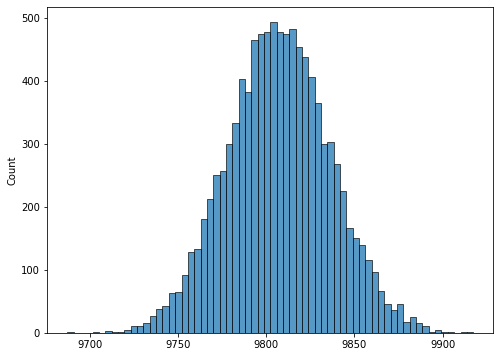



# 99% confidence interval: [9734.09 9882.65]
# 95% confidence interval: [9750.03 9864.88]
# 90% confidence interval: [9758.91 9855.89]


In [ ]:
# Confidence interval calculation for each male average spending using Bootstrapping
male_means_survey=[]
for i in range(10000):
  k=np.mean(np.random.choice(male_customers['male_purchase_mean'],size=4225))
  male_means_survey.append(k)

plt.figure(figsize=(8,6))
sns.histplot(data=male_means_survey)
plt.show()
print('\n')
print('# 99% confidence interval:',np.percentile(male_means_survey,[0.5,99.5]).round(2))
print('# 95% confidence interval:',np.percentile(male_means_survey,[2.5,97.5]).round(2))
print('# 90% confidence interval:',np.percentile(male_means_survey,[5,95]).round(2))

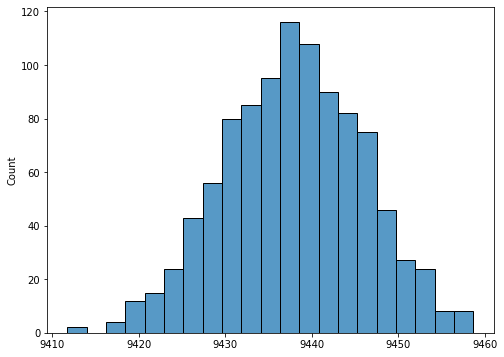



# 99% confidence interval: [9418.25 9456.8 ]
# 95% confidence interval: [9422.34 9452.8 ]
# 90% confidence interval: [9424.7  9450.66]


In [ ]:
# Confidence interval calculation for overall average male spending using Bootstrapping
male_survey=[]
for i in range(1000):
  m=np.mean(np.random.choice(df.loc[df['Gender']=='M']['Purchase'],size=414259))
  male_survey.append(m)

plt.figure(figsize=(8,6))
sns.histplot(data=male_survey)
plt.show()
print('\n')
print('# 99% confidence interval:',np.percentile(male_survey,[0.5,99.5]).round(2))
print('# 95% confidence interval:',np.percentile(male_survey,[2.5,97.5]).round(2))
print('# 90% confidence interval:',np.percentile(male_survey,[5,95]).round(2))

Text(0, 0.5, 'Sample mean')

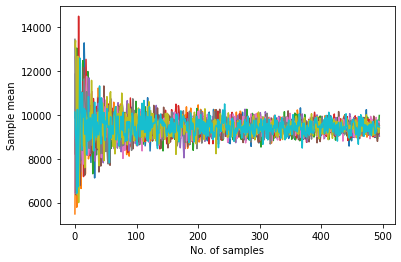

In [ ]:
# Plotting sampling mean trend of males for 10 observations across 5 to 500 samples
for i in range(10):
  male_sample_means=[]
  for j in range(5,500):
    k=df.loc[df['Gender']=='M']['Purchase'].sample(j).mean()
    male_sample_means.append(k)
  plt.plot(male_sample_means)
plt.xlabel('No. of samples')
plt.ylabel('Sample mean')

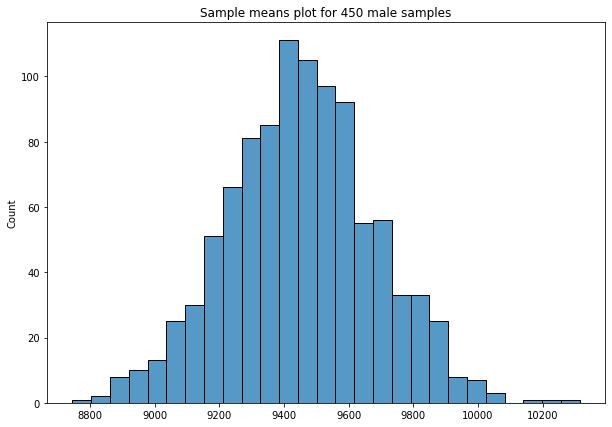



# 95% confidence interval: [8967.04, 9908.01]
# 90% confidence interval: [9042.68, 9832.37]


In [ ]:
# Using CLT, finding confidence interval for overall average male spending through 450 samples
plt.figure(figsize=(10,7))                                           
no_of_samples=450
sample_means=[]
for i in range(1000):
  k=df.loc[df['Gender']=='M']['Purchase'].sample(no_of_samples).mean()
  sample_means.append(k)

sns.histplot(data=sample_means)
plt.title('Sample means plot for 450 male samples')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Gender']=='M']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Gender']=='M']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Gender']=='M']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Gender']=='M']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

print('# 90% confidence interval:',[(df.loc[df['Gender']=='M']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Gender']=='M']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Gender']=='M']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Gender']=='M']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

In [ ]:
female_spending = df.loc[df['Gender']=='F']
female_customers=female_spending.groupby('User_ID').agg(female_purchase_mean=('Purchase','mean'),
                                                   female_purchase_max=('Purchase','max'),
                                                   female_purchase_min=('Purchase','min'))
female_customers.reset_index(inplace=True)
female_customers

,User_ID,female_purchase_mean,female_purchase_max,female_purchase_min
0,1000001,9545.514286,19219,612
1,1000006,8083.617021,19538,480
2,1000010,9728.744395,20957,24
3,1000011,7957.471429,20175,121
4,1000016,6840.454545,19657,62
...,...,...,...,...
1661,1006035,6293.717105,20144,371
1662,1006036,8007.894942,23525,137
1663,1006037,9176.540984,23714,579
1664,1006038,7502.833333,13565,365


In [ ]:
female_spending['User_ID'].value_counts().head(15)

1001150    752
1001088    680
1003224    622
1003539    617
1005643    573
1000752    572
1001448    570
1001605    558
1006036    514
1003292    502
1005812    499
1002106    497
1002820    495
1000531    490
1003067    486
Name: User_ID, dtype: int64

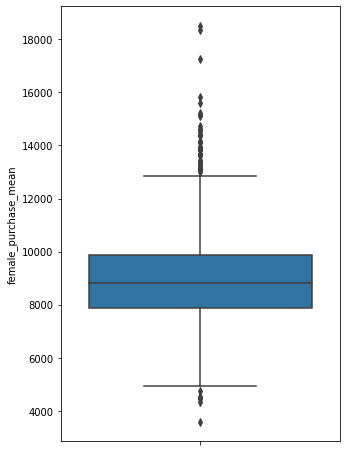

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(data=female_customers, y='female_purchase_mean')
plt.show()

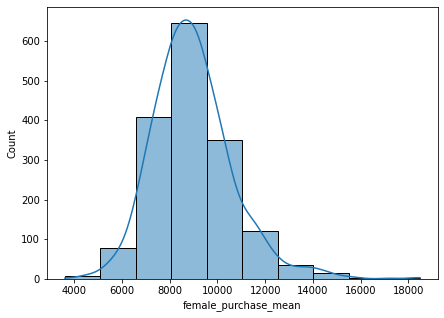

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=female_customers,x='female_purchase_mean',bins=10,kde=True)
plt.show()

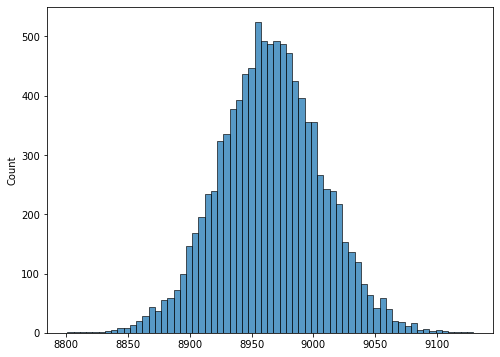



# 99% confidence interval: [8859.3  9075.13]
# 95% confidence interval: [8883.54 9046.99]
# 90% confidence interval: [8898.56 9033.25]


In [ ]:
# Confidence interval calculation for each female average spending using Bootstrapping
female_means_survey=[]
for i in range(10000):
  k=np.mean(np.random.choice(female_customers['female_purchase_mean'],size=1666))
  female_means_survey.append(k)

plt.figure(figsize=(8,6))
sns.histplot(data=female_means_survey)
plt.show()
print('\n')
print('# 99% confidence interval:',np.percentile(female_means_survey,[0.5,99.5]).round(2))
print('# 95% confidence interval:',np.percentile(female_means_survey,[2.5,97.5]).round(2))
print('# 90% confidence interval:',np.percentile(female_means_survey,[5,95]).round(2))

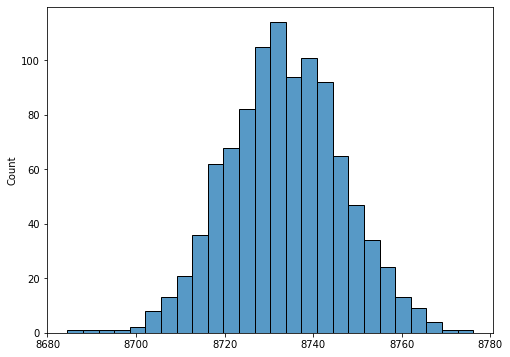



# 99% confidence interval: [8702.06 8765.66]
# 95% confidence interval: [8708.91 8759.09]
# 90% confidence interval: [8712.87 8755.17]


In [ ]:
# Confidence interval calculation for overall average female spending using Bootstrapping
female_survey=[]
for i in range(1000):
  f=np.mean(np.random.choice(df.loc[df['Gender']=='F']['Purchase'],size=135809))
  female_survey.append(f)

plt.figure(figsize=(8,6))
sns.histplot(data=female_survey)
plt.show()
print('\n')
print('# 99% confidence interval:',np.percentile(female_survey,[0.5,99.5]).round(2))
print('# 95% confidence interval:',np.percentile(female_survey,[2.5,97.5]).round(2))
print('# 90% confidence interval:',np.percentile(female_survey,[5,95]).round(2))

Text(0, 0.5, 'Sample mean')

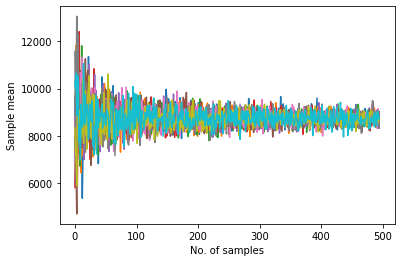

In [ ]:
# Plotting sampling mean trend of females for 10 observations across 5 to 500 samples
for i in range(10):
  female_sample_means=[]
  for j in range(5,500):
    k=df.loc[df['Gender']=='F']['Purchase'].sample(j).mean()
    female_sample_means.append(k)
  plt.plot(female_sample_means)
plt.xlabel('No. of samples')
plt.ylabel('Sample mean')

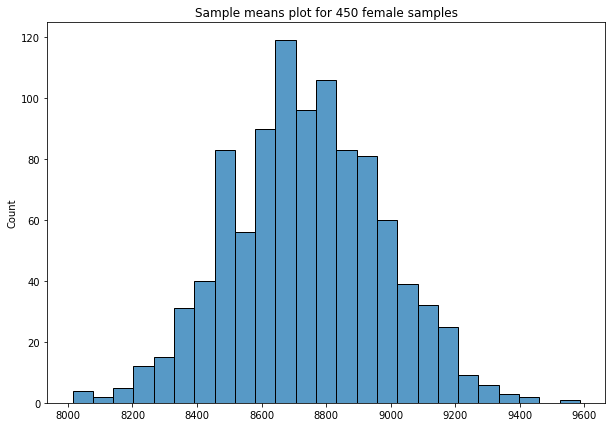



# 95% confidence interval: [8294.1, 9175.03]
# 90% confidence interval: [8364.92, 9104.21]


In [ ]:
# Using CLT, finding confidence interval for overall average female spending through 450 samples
plt.figure(figsize=(10,7))                                           
no_of_samples=450
sample_means=[]
for i in range(1000):
  k=df.loc[df['Gender']=='F']['Purchase'].sample(no_of_samples).mean()
  sample_means.append(k)

sns.histplot(data=sample_means)
plt.title('Sample means plot for 450 female samples')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Gender']=='F']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Gender']=='F']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Gender']=='F']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Gender']=='F']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Gender']=='F']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Gender']=='F']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Gender']=='F']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Gender']=='F']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])


Analyzing spending patterns across various Age Group

In [ ]:
df['Age'].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

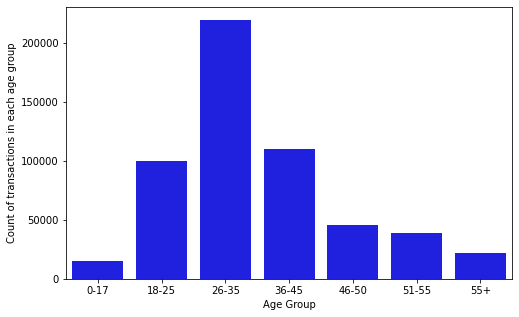

In [ ]:
# Countplot to visualise the count of spending in each age group 
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age', 
              order=df['Age'].value_counts().sort_index().index, 
              color='blue')
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count of transactions in each age group', fontsize=10)
plt.show()

In [ ]:
age_grouping=df.groupby('Age').agg(Sum_purchase_per_age_group=('Purchase','sum'),
                                  Mean_purchase_per_age_group=('Purchase','mean'),
                                   Std_purchase_per_age_group=('Purchase','std'))
age_grouping.reset_index(inplace=True)
age_grouping

,Age,Sum_purchase_per_age_group,Mean_purchase_per_age_group,Std_purchase_per_age_group
0,0-17,134913183,8933.464640,5111.114046
1,18-25,913848675,9169.663606,5034.321997
2,26-35,2031770578,9252.690633,5010.527303
3,36-45,1026569884,9331.350695,5022.923879
4,46-50,420843403,9208.625697,4967.216367
5,51-55,367099644,9534.808031,5087.368080
6,55+,200767375,9336.280459,5011.493996


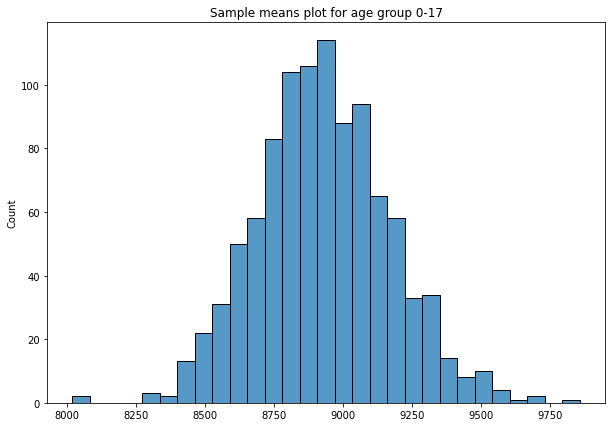



# 95% confidence interval: [8461.23, 9405.7]
# 90% confidence interval: [8537.15, 9329.78]


In [ ]:
# Using CLT, finding confidence interval for overall average spending through 450 samples for 0-17 age group
plt.figure(figsize=(10,7))                                           
no_of_samples=450
sample_means=[]
for i in range(1000):
  k=df.loc[df['Age']=='0-17']['Purchase'].sample(no_of_samples).mean()
  sample_means.append(k)

sns.histplot(data=sample_means)
plt.title('Sample means plot for age group 0-17')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Age']=='0-17']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Age']=='0-17']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='0-17']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Age']=='0-17']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Age']=='0-17']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Age']=='0-17']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='0-17']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Age']=='0-17']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

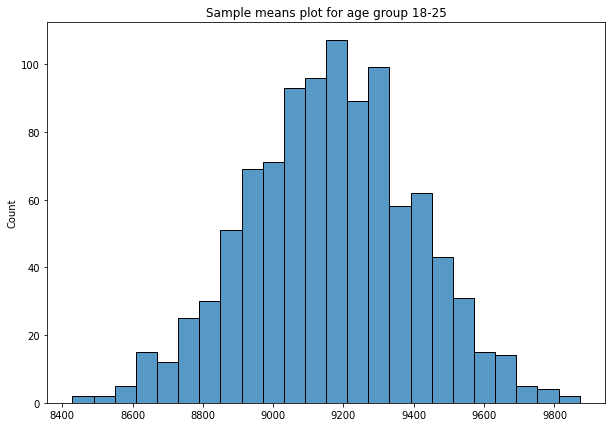



# 95% confidence interval: [8704.52, 9634.8]
# 90% confidence interval: [8779.31, 9560.02]


In [ ]:
# Using CLT, finding confidence interval for overall average spending through 450 samples for 18-25 age group
plt.figure(figsize=(10,7))                                           
no_of_samples=450
sample_means=[]
for i in range(1000):
  k=df.loc[df['Age']=='18-25']['Purchase'].sample(no_of_samples).mean()
  sample_means.append(k)

sns.histplot(data=sample_means)
plt.title('Sample means plot for age group 18-25')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Age']=='18-25']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Age']=='18-25']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='18-25']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Age']=='18-25']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Age']=='18-25']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Age']=='18-25']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='18-25']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Age']=='18-25']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

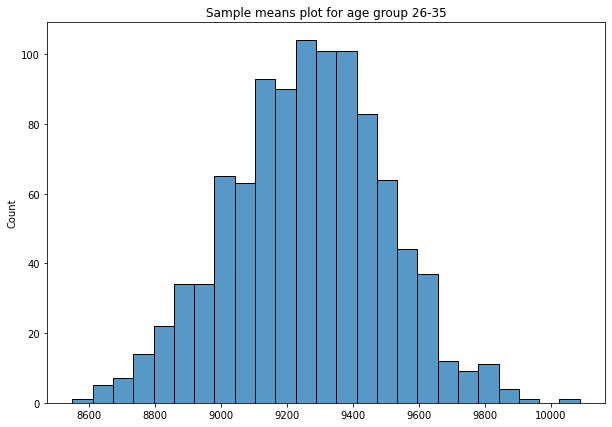



# 95% confidence interval: [8789.75, 9715.63]
# 90% confidence interval: [8864.18, 9641.2]


In [ ]:
# Using CLT, finding confidence interval for overall average spending through 450 samples for 26-35 age group
plt.figure(figsize=(10,7))                                           
no_of_samples=450
sample_means=[]
for i in range(1000):
  k=df.loc[df['Age']=='26-35']['Purchase'].sample(no_of_samples).mean()
  sample_means.append(k)

sns.histplot(data=sample_means)
plt.title('Sample means plot for age group 26-35')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Age']=='26-35']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Age']=='26-35']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='26-35']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Age']=='26-35']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Age']=='26-35']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Age']=='26-35']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='26-35']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Age']=='26-35']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

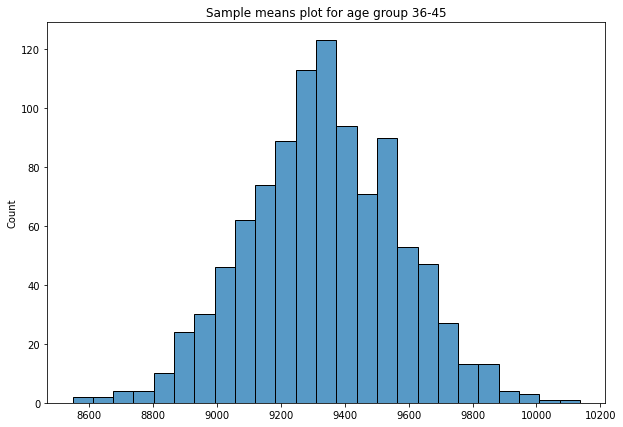



# 95% confidence interval: [8867.26, 9795.44]
# 90% confidence interval: [8941.88, 9720.82]


In [ ]:
# Using CLT, finding confidence interval for overall average spending through 450 samples for 36-45 age group
plt.figure(figsize=(10,7))                                           
no_of_samples=450
sample_means=[]
for i in range(1000):
  k=df.loc[df['Age']=='36-45']['Purchase'].sample(no_of_samples).mean()
  sample_means.append(k)

sns.histplot(data=sample_means)
plt.title('Sample means plot for age group 36-45')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Age']=='36-45']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Age']=='36-45']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='36-45']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Age']=='36-45']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Age']=='36-45']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Age']=='36-45']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='36-45']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Age']=='36-45']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

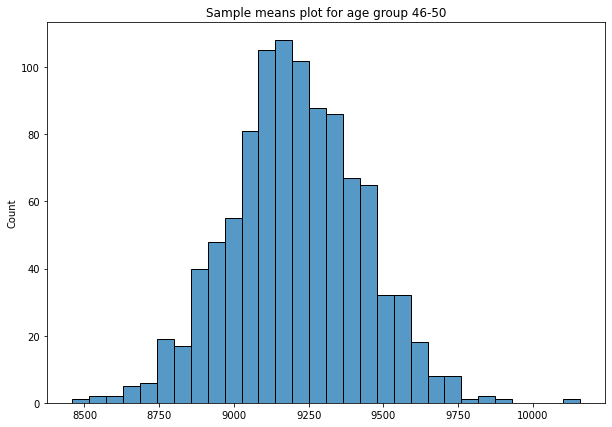



# 95% confidence interval: [8749.69, 9667.56]
# 90% confidence interval: [8823.47, 9593.78]


In [ ]:
# Using CLT, finding confidence interval for overall average spending through 450 samples for 46-50 age group
plt.figure(figsize=(10,7))                                           
no_of_samples=450
sample_means=[]
for i in range(1000):
  k=df.loc[df['Age']=='46-50']['Purchase'].sample(no_of_samples).mean()
  sample_means.append(k)

sns.histplot(data=sample_means)
plt.title('Sample means plot for age group 46-50')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Age']=='46-50']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Age']=='46-50']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='46-50']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Age']=='46-50']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Age']=='46-50']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Age']=='46-50']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='46-50']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Age']=='46-50']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

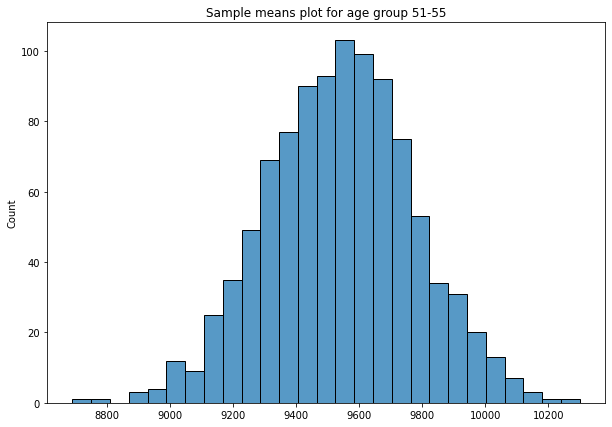



# 95% confidence interval: [9064.77, 10004.85]
# 90% confidence interval: [9140.34, 9929.28]


In [ ]:
# Using CLT, finding confidence interval for overall average spending through 450 samples for 51-55 age group
plt.figure(figsize=(10,7))                                           
no_of_samples=450
sample_means=[]
for i in range(1000):
  k=df.loc[df['Age']=='51-55']['Purchase'].sample(no_of_samples).mean()
  sample_means.append(k)

sns.histplot(data=sample_means)
plt.title('Sample means plot for age group 51-55')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Age']=='51-55']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Age']=='51-55']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='51-55']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Age']=='51-55']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Age']=='51-55']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Age']=='51-55']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='51-55']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Age']=='51-55']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

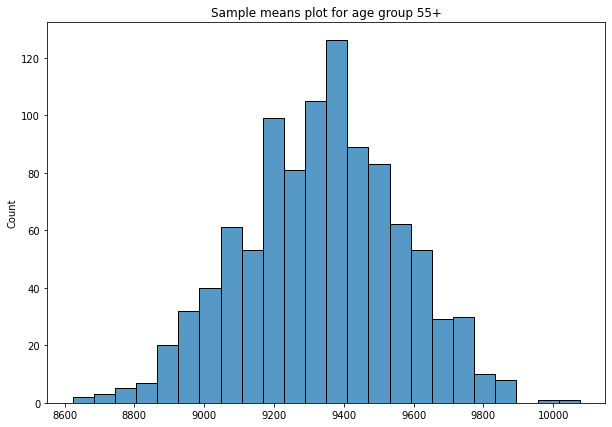



# 95% confidence interval: [8873.25, 9799.31]
# 90% confidence interval: [8947.69, 9724.87]


In [ ]:
# Using CLT, finding confidence interval for overall average spending through 450 samples for 55+ age group
plt.figure(figsize=(10,7))                                           
no_of_samples=450
sample_means=[]
for i in range(1000):
  k=df.loc[df['Age']=='55+']['Purchase'].sample(no_of_samples).mean()
  sample_means.append(k)

sns.histplot(data=sample_means)
plt.title('Sample means plot for age group 55+')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Age']=='55+']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Age']=='55+']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='55+']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Age']=='55+']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Age']=='55+']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Age']=='55+']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Age']=='55+']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Age']=='55+']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

Analyzing spending patterns across Marital Status

In [ ]:
df['Marital_Status'].value_counts(normalize=True)*100      # percentage of transactions done by married and unmarried people

Unmarried    59.034701
Married      40.965299
Name: Marital_Status, dtype: float64

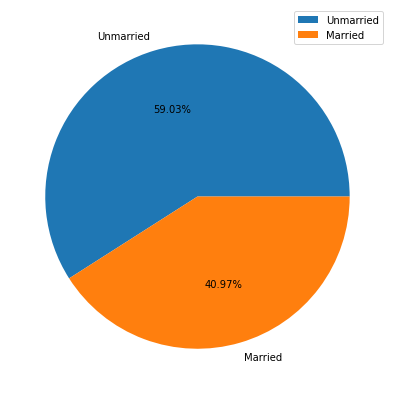

In [ ]:
# Plotting pieplot to visualize the percentage count of married and unmarried people spending in the sample data
plt.figure(figsize=(10,7))
plt.pie(df['Marital_Status'].value_counts(), 
        labels=df['Marital_Status'].value_counts().index, 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

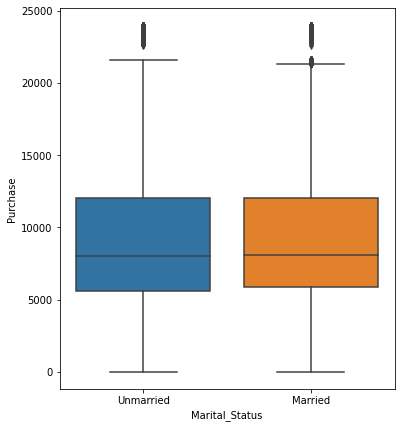

In [ ]:
plt.figure(figsize=(6,7))
sns.boxplot(data=df, x='Marital_Status', y='Purchase')
plt.show()

In [ ]:
MS_grouping=df.groupby('Marital_Status').agg(Sum_purchase_per_MS=('Purchase','sum'),
                                  Mean_purchase_per_MS=('Purchase','mean'),
                                  Std_purchase_per_MS=('Purchase','std'))
MS_grouping.reset_index(inplace=True)
MS_grouping

,Marital_Status,Sum_purchase_per_MS,Mean_purchase_per_MS,Std_purchase_per_MS
0,Married,2086885295,9261.174574,5016.897378
1,Unmarried,3008927447,9265.907619,5027.347859


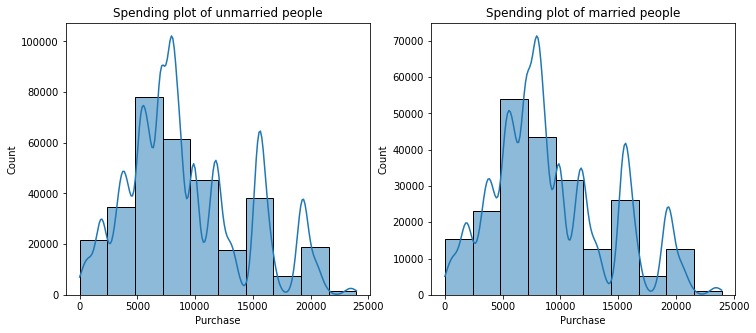

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=df.loc[df['Marital_Status']=='Unmarried'], x='Purchase', bins=10, kde=True)
plt.title('Spending plot of unmarried people')

plt.subplot(1,2,2)
sns.histplot(data=df.loc[df['Marital_Status']=='Married'], x='Purchase', bins=10, kde=True)
plt.title('Spending plot of married people')

plt.show()

Text(0, 0.5, 'Sample mean')

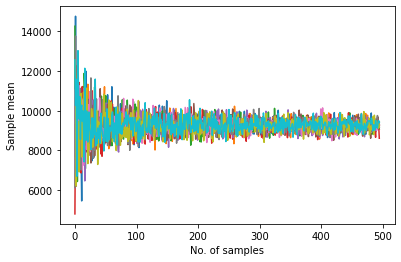

In [ ]:
# Plotting sampling mean trend of sample data for 10 observations across 5 to 500 samples for Unmarried people
for i in range(10):
  um_sample_means=[]
  for j in range(5,500):
    k=df.loc[df['Marital_Status']=='Unmarried']['Purchase'].sample(j).mean()
    um_sample_means.append(k)
  plt.plot(um_sample_means)
plt.xlabel('No. of samples')
plt.ylabel('Sample mean')

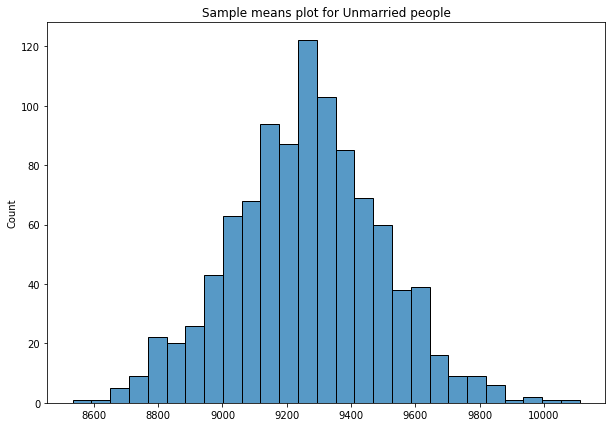



# 95% confidence interval: [8801.41, 9730.4]
# 90% confidence interval: [8876.09, 9655.72]


In [ ]:
# Using CLT, finding confidence interval for overall average spending through 450 samples for Unmarried people
plt.figure(figsize=(10,7))                                           
no_of_samples=450
um_sample_means=[]
for i in range(1000):
  k=df.loc[df['Marital_Status']=='Unmarried']['Purchase'].sample(no_of_samples).mean()
  um_sample_means.append(k)

sns.histplot(data=um_sample_means)
plt.title('Sample means plot for Unmarried people')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Marital_Status']=='Unmarried']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Marital_Status']=='Unmarried']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Marital_Status']=='Unmarried']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Marital_Status']=='Unmarried']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Marital_Status']=='Unmarried']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Marital_Status']=='Unmarried']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Marital_Status']=='Unmarried']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Marital_Status']=='Unmarried']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

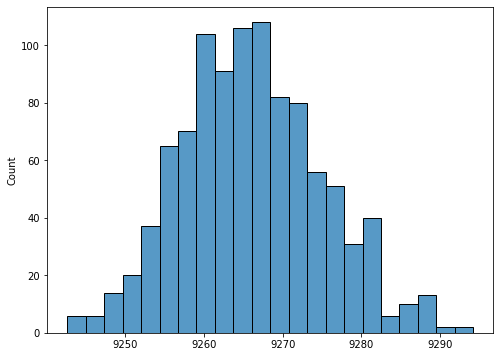



# 99% confidence interval: [9244.89 9289.16]
# 95% confidence interval: [9249.64 9285.12]
# 90% confidence interval: [9252.44 9281.26]


In [ ]:
# Confidence interval calculation for overall average spending of Unmarried people using Bootstrapping
um_survey=[]
for i in range(1000):
  um=np.mean(np.random.choice(df.loc[df['Marital_Status']=='Unmarried']['Purchase'],size=324731))
  um_survey.append(um)

plt.figure(figsize=(8,6))
sns.histplot(data=um_survey)
plt.show()
print('\n')
print('# 99% confidence interval:',np.percentile(um_survey,[0.5,99.5]).round(2))
print('# 95% confidence interval:',np.percentile(um_survey,[2.5,97.5]).round(2))
print('# 90% confidence interval:',np.percentile(um_survey,[5,95]).round(2))

Text(0, 0.5, 'Sample mean')

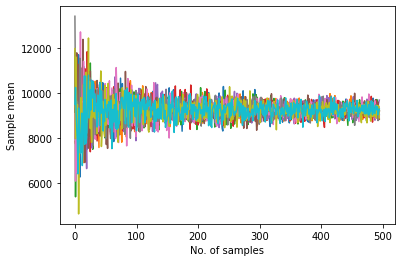

In [ ]:
# Plotting sampling mean trend of sample data for 10 observations across 5 to 500 samples for Married people
for i in range(10):
  m_sample_means=[]
  for j in range(5,500):
    k=df.loc[df['Marital_Status']=='Married']['Purchase'].sample(j).mean()
    m_sample_means.append(k)
  plt.plot(m_sample_means)
plt.xlabel('No. of samples')
plt.ylabel('Sample mean')

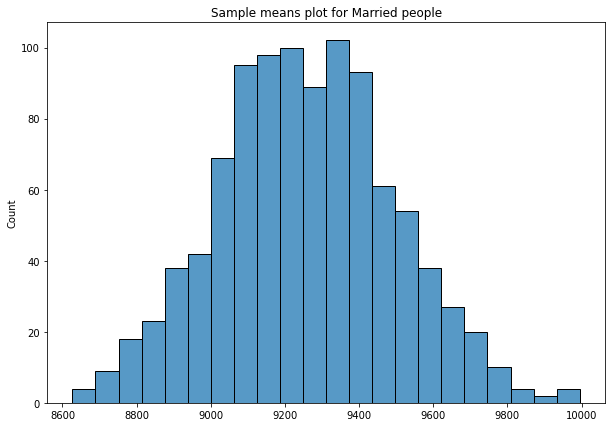



# 95% confidence interval: [8797.65, 9724.7]
# 90% confidence interval: [8872.17, 9650.18]


In [ ]:
# Using CLT, finding confidence interval for overall average spending through 450 samples for Married people
plt.figure(figsize=(10,7))                                           
no_of_samples=450
m_sample_means=[]
for i in range(1000):
  k=df.loc[df['Marital_Status']=='Married']['Purchase'].sample(no_of_samples).mean()
  m_sample_means.append(k)

sns.histplot(data=m_sample_means)
plt.title('Sample means plot for Married people')        
plt.show()

print('\n')
print('# 95% confidence interval:',[(df.loc[df['Marital_Status']=='Married']['Purchase'].mean()+norm.ppf(0.025)*df.loc[df['Marital_Status']=='Married']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Marital_Status']=='Married']['Purchase'].mean()+norm.ppf(0.975)*df.loc[df['Marital_Status']=='Married']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])
print('# 90% confidence interval:',[(df.loc[df['Marital_Status']=='Married']['Purchase'].mean()+norm.ppf(0.05)*df.loc[df['Marital_Status']=='Married']['Purchase'].std()/math.sqrt(no_of_samples)).round(2),
                                             (df.loc[df['Marital_Status']=='Married']['Purchase'].mean()+norm.ppf(0.95)*df.loc[df['Marital_Status']=='Married']['Purchase'].std()/math.sqrt(no_of_samples)).round(2)])

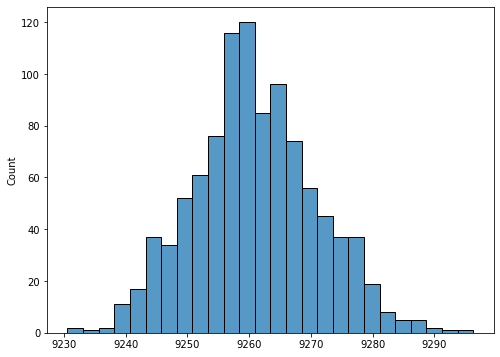



# 99% confidence interval: [9238.65 9288.54]
# 95% confidence interval: [9241.88 9280.31]
# 90% confidence interval: [9244.53 9277.66]


In [ ]:
# Confidence interval calculation for overall average spending of Married people using Bootstrapping
m_survey=[]
for i in range(1000):
  m=np.mean(np.random.choice(df.loc[df['Marital_Status']=='Married']['Purchase'],size=225337))
  m_survey.append(m)

plt.figure(figsize=(8,6))
sns.histplot(data=m_survey)
plt.show()
print('\n')
print('# 99% confidence interval:',np.percentile(m_survey,[0.5,99.5]).round(2))
print('# 95% confidence interval:',np.percentile(m_survey,[2.5,97.5]).round(2))
print('# 90% confidence interval:',np.percentile(m_survey,[5,95]).round(2))

Analyzing spending patterns across various Cities

In [ ]:
df['City_Category'].value_counts(normalize=True)*100            # percentage of transactions done in each city

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

In [ ]:
city_grouping=df.groupby('City_Category').agg(Sum_purchase_per_city=('Purchase','sum'),
                                  Mean_purchase_per_city=('Purchase','mean'))
city_grouping.reset_index(inplace=True)
city_grouping

,City_Category,Sum_purchase_per_city,Mean_purchase_per_city
0,A,1316471661,8911.939216
1,B,2115533605,9151.300563
2,C,1663807476,9719.920993


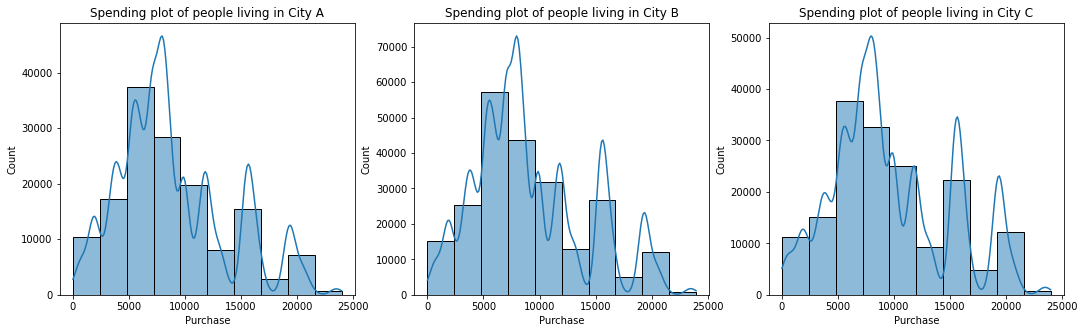

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(data=df.loc[df['City_Category']=='A'], x='Purchase', bins=10, kde=True)
plt.title('Spending plot of people living in City A')

plt.subplot(1,3,2)
sns.histplot(data=df.loc[df['City_Category']=='B'], x='Purchase', bins=10, kde=True)
plt.title('Spending plot of people living in City B')

plt.subplot(1,3,3)
sns.histplot(data=df.loc[df['City_Category']=='C'], x='Purchase', bins=10, kde=True)
plt.title('Spending plot of people living in City C')

plt.show()

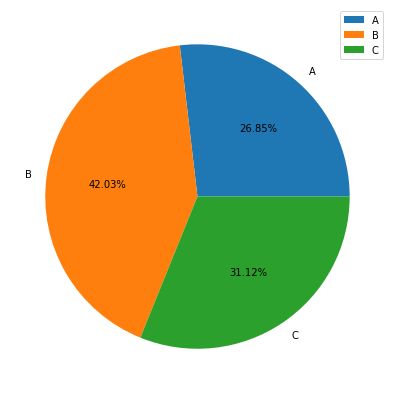

In [ ]:
# Plotting Pieplot to visualize the percentage count of spending in different cities in the sample data
plt.figure(figsize=(10,7))
plt.pie(df['City_Category'].value_counts().sort_index(), 
        labels=df['City_Category'].value_counts().sort_index().index, 
        autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

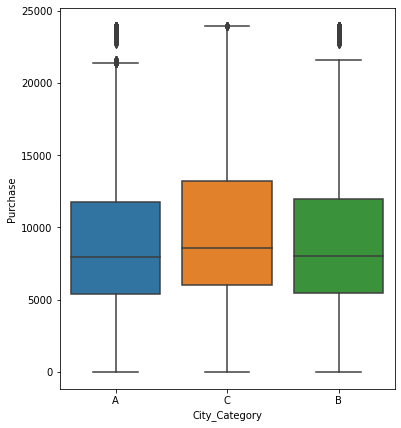

In [ ]:
plt.figure(figsize=(6,7))
sns.boxplot(data=df, x='City_Category', y='Purchase')
plt.show()

Product Category

In [ ]:
df['Product_Category'].value_counts(normalize=True).head(10)*100         # top 10 product categories in terms of percentage of transactions

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
Name: Product_Category, dtype: float64

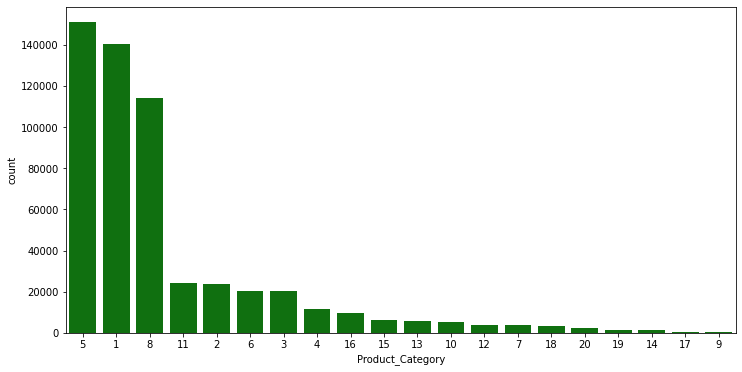

In [ ]:
# Countplot to visualise the count of spending on each product category
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index, color='green')
plt.show()

Business Insights:

	1.	The male spending is 75% whereas the female spending is 25%, although there are 72% males and 28% females in the sample data.
	2.	The sample data is of 20 different product categories spreading across 3631 product ids.
	3.	The average males spending is more than the average females spending in the sample dataset, but male spending has higher standard deviation as per the sample data. Also, a male tends to spend more than a female on average.
	4.	People of age group 26-35 tend to spend the most, followed by those in the age group 36-45, followed by the ones in 18-25, while those of age group of 0-17 tend to spend the least. The count plot verifies the same.
	5.	People who are unmarried does a lot more spending that the ones who are married. The ratio is almost 3:2 as evident by the pie plot. This is probably because the sample contains the maximum amount of people who are young.
	6.	There isn’t much difference in the mean spending of both the categories of people. Both spend close to $9300 as per the sample data.
	7.	People living in City B tends to buy more items but people in City C spends the most compared to any of the other 2 cities. People living in City A buys less items and spend the least. This maybe because of the small population, low economic activity, etc.
	8.	The product category 5,1, and 8 are the most purchased product categories in the sample data, accounting to almost 74% of the bought categories. This may be essential daily use items.

**Final Insights:**

	1.	The various confidence intervals calculated for average male spending using CLT are [8967, 9908] with 95% confidence, [9043, 9832] with 90% confidence, but using bootstrapping the confidence intervals are [9418, 9457] with 99% confidence, [9422, 9453] with 95% confidence, and [9425, 9561] with 90% confidence.
	2.	The various confidence intervals calculated for average female spending using CLT are [8294, 9175] with 95% confidence, [8365, 9104] with 90% confidence, but using bootstrapping the confidence intervals are [8702, 8766] with 99% confidence, [8709, 8759] with 95% confidence, and [8713, 8755] with 90% confidence.
	3.	The sampling mean trend is plotted for the same and it was found that for the 10 observations, as the sample size increased from 5 to 500 samples , the graph began to converge at a single point with less variance.
	4.	The sample mean of purchase for males and females are 9438 and 8735. The confidence intervals are calculated around it by normalising the sample data of purchase using CLT.
	5.	The various confidence intervals calculated for average spending per different age group using CLT are [8461, 9406] with 95% confidence for 0-17 age group, [8705, 9635] with 95% confidence for 18-25 age group, [8790, 9716] with 95% confidence for 26-35 age group, [8867, 9795] with 95% confidence for 36-45 age group, [8750, 9668] with 95% confidence for 46-50 age group, [9065, 10005] with 95% confidence for 51-55 age group, [8873, 9799] with 95% confidence for 55+ age group.
	6.	The age group of 51-55 has very high confidence interval. This shows that average spending of the customers in this age group is very high.
	7.	The sample mean of purchase for the unmarried and married customers are almost similar, which is 9266, and 9261.
	8.	The various confidence intervals calculated for average unmarried spending using CLT are [8801, 9730] with 95% confidence, [8876, 9656] with 90% confidence, but using bootstrapping the confidence intervals change drastically equivalent to [9245, 9289] with 99% confidence, [9250, 9285] with 95% confidence, and [9252, 9281] with 90% confidence.
	9.	The various confidence intervals calculated for average married spending using CLT are [8798, 9725] with 95% confidence, [8872, 9650] with 90% confidence, but using bootstrapping the confidence intervals are [9239, 9289] with 99% confidence, [9242, 9280] with 95% confidence, and [9245, 9278] with 90% confidence.
	10.	The histogram is plotted for every confidence interval calculation so as to visualize the transformed sample data to a normal distribution using CLT.

**Recommendations:**

	1.	It is evident from the sample data confidence interval using bootstrapping that males tend to spend more on average than females therefore, therefore Walmart should focus to promote business more among males than among females.
	2.	The people with age group less than 45 account for 78% of spending, solely because the young population has more demands for essential items and are mostly in fashion than the elder ones. Therefore Walmart should focus more on chipping in products in its store that lure young population.
	3.	The customers of age group 51-55 are the type of people which tend to have higher average amount of spending. This could be because this category of customers have higher income and are mostly settled. Therefore they can have afford higher priced items especially luxury items. Walmart must have at least a dedicated section of higher priced items in each of its stores especially on festivals to make it more profitable.
	4.	The unmarried people tend to buy more items but the average amount of spending by married and unmarried customers are almost similar. Most of the young unmarried customers have high tendency to buy items, Therefore, Walmart can publish advertisements targeting the young unmarried audience to visit stores.
	5.	Walmart should consider opening more stores in City C as this city has seen highest overall average spending by the customers in the sample data. This must be because of the high economic activity, large population, feasible geographic location of the city, etc.
	6.	The products with product id 5, 1, and 8 account for 74% of sales in the sample data. Hence, these are highly valued products and could be essential items. Walmart should consider opening separate stores with these items in the close vicinity of high population density areas in various city.